# Diverse Stock Protfolio Generated by KMeans

Based on [Build A Diverse Stock Portfolio Using Python & K-Means Machine Learning Algorithm](https://www.youtube.com/watch?v=CS9L2QsA4bM) from [Computer Science](https://www.youtube.com/channel/UCbmb5IoBtHZTpYZCDBOC1CA)

**Disclaimer:** _Investing in the stock market involves risk and can lead to monetary loss. This material is purely for educational purposes and should not be taken as professional investment advice. Invest at your own discretion._

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("NASDAQ.csv")

Show the data

In [4]:
df

,Date,AAPL,MSFT,AMZN,FB,GOOG,TSLA,NVDA,GOOGL,PYPL,...,SIRI,VRSN,CDW,SPLK,CERN,DLTR,TCOM,INCY,CHKP,FOX
0,2013-01-02,17.010899,23.074232,257.309998,28.000000,360.274597,7.072000,11.763624,361.987000,NaN,...,2.903769,39.849998,NaN,29.260000,39.257896,39.900002,11.580000,17.000000,49.240002,NaN
1,2013-01-03,16.796177,22.765125,258.480011,27.770000,360.483826,6.954000,11.772869,362.197205,NaN,...,2.961460,40.029999,NaN,29.350000,39.140781,39.480000,11.675000,17.100000,47.180000,NaN
2,2013-01-04,16.328323,22.339064,259.149994,28.760000,367.607117,6.880000,12.161294,369.354340,NaN,...,2.980690,40.040001,NaN,29.680000,39.560448,39.619999,11.795000,17.280001,46.840000,NaN
3,2013-01-07,16.232281,22.297297,268.459991,29.420000,366.003143,6.868000,11.809867,367.742737,NaN,...,2.961460,40.060001,NaN,29.360001,40.512001,39.959999,11.850000,17.889999,47.200001,NaN
4,2013-01-08,16.275965,22.180330,266.380005,29.059999,365.280823,6.736000,11.550920,367.017029,NaN,...,3.019151,39.889999,NaN,28.879999,39.980110,39.009998,11.680000,18.799999,48.220001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,2021-06-21,132.300003,262.630005,3453.959961,332.290009,2529.100098,620.830017,737.090027,2436.250000,283.100006,...,6.320000,224.740005,169.729996,125.489998,79.256630,101.190002,36.860001,84.930000,119.250000,35.770000
2132,2021-06-22,133.979996,265.510010,3505.439941,339.029999,2539.989990,623.710022,755.469971,2446.610107,286.750000,...,6.360000,226.850006,171.139999,139.610001,78.847778,100.879997,36.689999,85.089996,119.080002,35.740002
2133,2021-06-23,133.699997,265.269989,3503.820068,340.589996,2529.229980,656.570007,762.289978,2442.540039,288.119995,...,6.290000,226.309998,169.100006,137.699997,77.920395,101.489998,36.490002,85.129997,116.970001,35.700001
2134,2021-06-24,133.410004,266.690002,3449.080078,343.179993,2545.639893,679.820007,768.219971,2450.000000,293.209991,...,6.410000,229.429993,170.289993,139.729996,78.059998,99.339996,36.759998,86.129997,116.589996,36.279999


Remove the date column

In [5]:
df.drop('Date', axis=1, inplace=True)

In [6]:
df

,AAPL,MSFT,AMZN,FB,GOOG,TSLA,NVDA,GOOGL,PYPL,ADBE,...,SIRI,VRSN,CDW,SPLK,CERN,DLTR,TCOM,INCY,CHKP,FOX
0,17.010899,23.074232,257.309998,28.000000,360.274597,7.072000,11.763624,361.987000,NaN,38.340000,...,2.903769,39.849998,NaN,29.260000,39.257896,39.900002,11.580000,17.000000,49.240002,NaN
1,16.796177,22.765125,258.480011,27.770000,360.483826,6.954000,11.772869,362.197205,NaN,37.750000,...,2.961460,40.029999,NaN,29.350000,39.140781,39.480000,11.675000,17.100000,47.180000,NaN
2,16.328323,22.339064,259.149994,28.760000,367.607117,6.880000,12.161294,369.354340,NaN,38.130001,...,2.980690,40.040001,NaN,29.680000,39.560448,39.619999,11.795000,17.280001,46.840000,NaN
3,16.232281,22.297297,268.459991,29.420000,366.003143,6.868000,11.809867,367.742737,NaN,37.939999,...,2.961460,40.060001,NaN,29.360001,40.512001,39.959999,11.850000,17.889999,47.200001,NaN
4,16.275965,22.180330,266.380005,29.059999,365.280823,6.736000,11.550920,367.017029,NaN,38.139999,...,3.019151,39.889999,NaN,28.879999,39.980110,39.009998,11.680000,18.799999,48.220001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,132.300003,262.630005,3453.959961,332.290009,2529.100098,620.830017,737.090027,2436.250000,283.100006,567.349976,...,6.320000,224.740005,169.729996,125.489998,79.256630,101.190002,36.860001,84.930000,119.250000,35.770000
2132,133.979996,265.510010,3505.439941,339.029999,2539.989990,623.710022,755.469971,2446.610107,286.750000,575.739990,...,6.360000,226.850006,171.139999,139.610001,78.847778,100.879997,36.689999,85.089996,119.080002,35.740002
2133,133.699997,265.269989,3503.820068,340.589996,2529.229980,656.570007,762.289978,2442.540039,288.119995,574.229980,...,6.290000,226.309998,169.100006,137.699997,77.920395,101.489998,36.490002,85.129997,116.970001,35.700001
2134,133.410004,266.690002,3449.080078,343.179993,2545.639893,679.820007,768.219971,2450.000000,293.209991,578.260010,...,6.410000,229.429993,170.289993,139.729996,78.059998,99.339996,36.759998,86.129997,116.589996,36.279999


Calculate the annual mean returns and variances

In [7]:
daily_returns = df.pct_change()
annual_mean_returns = daily_returns.mean() * 252
annual_return_variance = daily_returns.var() * 252

Create a new dataframe

In [8]:
df2 = pd.DataFrame(df.columns, columns=['Stock_Symbols'])

In [9]:
df2['Variances'] = annual_return_variance.values
df2['Returns'] = annual_mean_returns.values

Show the data

In [10]:
df2

,Stock_Symbols,Variances,Returns
0,AAPL,0.081513,0.283807
1,MSFT,0.069032,0.322812
2,AMZN,0.092010,0.350682
3,FB,0.117221,0.353218
4,GOOG,0.066264,0.263499
...,...,...,...
96,DLTR,0.088588,0.151314
97,TCOM,0.192610,0.227214
98,INCY,0.192233,0.287850
99,CHKP,0.051912,0.127917


Use the Elbow method to determine the number of clusters to use to group the stocks

In [11]:
# Get and store the annual returns and annual variances
X = df2[['Returns', 'Variances']].values
inertia_list = []
for k in range(2,16):
    # Create and train the model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

Plot the data

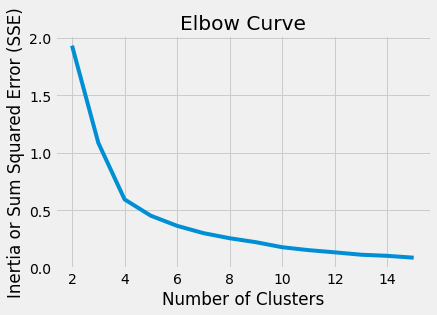

In [12]:
plt.plot(range(2,16), inertia_list)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia or Sum Squared Error (SSE)')
plt.show()

Get and show the labels

In [13]:
kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.labels_

In [14]:
labels

array([2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 0, 1, 2, 3, 2, 3, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 3, 2, 2, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1], dtype=int32)

In [15]:
df2['Cluster_Labels'] = labels

In [16]:
df2

,Stock_Symbols,Variances,Returns,Cluster_Labels
0,AAPL,0.081513,0.283807,2
1,MSFT,0.069032,0.322812,2
2,AMZN,0.092010,0.350682,2
3,FB,0.117221,0.353218,2
4,GOOG,0.066264,0.263499,2
...,...,...,...,...
96,DLTR,0.088588,0.151314,1
97,TCOM,0.192610,0.227214,2
98,INCY,0.192233,0.287850,2
99,CHKP,0.051912,0.127917,1


Plot and show the diff

Group 0
['TSLA' 'NVDA' 'NFLX' 'AMD' 'DOCU' 'PDD' 'DXCM' 'TEAM' 'OKTA']

Group 1
['GOOGL' 'CMCSA' 'INTC' 'CSCO' 'PEP' 'COST' 'QCOM' 'AMGN' 'SBUX' 'ISRG'
 'BKNG' 'MDLZ' 'GILD' 'ADP' 'CSX' 'FISV' 'ADI' 'REGN' 'BIDU' 'BIIB' 'KDP'
 'KHC' 'MNST' 'EBAY' 'WBA' 'MAR' 'ROST' 'EXC' 'AEP' 'ALXN' 'ORLY' 'PAYX'
 'CTSH' 'XLNX' 'XEL' 'PCAR' 'ANSS' 'FAST' 'VRSK' 'MXIM' 'SIRI' 'VRSN'
 'CERN' 'DLTR' 'CHKP' 'FOX']

Group 2
['AAPL' 'MSFT' 'AMZN' 'FB' 'GOOG' 'PYPL' 'ADBE' 'AVGO' 'TMUS' 'TXN' 'CHTR'
 'INTU' 'AMAT' 'MU' 'LRCX' 'MELI' 'ATVI' 'ILMN' 'JD' 'ADSK' 'NXPI' 'ASML'
 'IDXX' 'VRTX' 'KLAC' 'ALGN' 'MRVL' 'LULU' 'WDAY' 'MTCH' 'SNPS' 'EA'
 'MCHP' 'CTAS' 'CDNS' 'NTES' 'SWKS' 'CPRT' 'SGEN' 'CDW' 'SPLK' 'TCOM'
 'INCY']

Group 3
['MRNA' 'ZM' 'PTON']



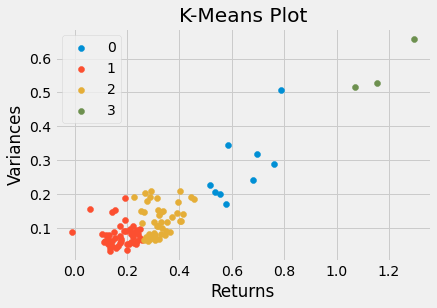

In [17]:
# plt.scatter(X[:,0], X[:,1], c = labels, cmap='rainbow', label = labels)
for elem in np.unique(labels):
    symbols = df2[df2.Cluster_Labels == elem]
    print("Group", elem)
    print(symbols['Stock_Symbols'].values)
    print()
    X = symbols[['Returns', 'Variances']].values
    plt.scatter(X[:,0], X[:,1], label = elem)
    symbols = df2[df2.Cluster_Labels == elem]

plt.legend(loc='best')
plt.title('K-Means Plot')
plt.xlabel('Returns')
plt.ylabel('Variances')
plt.show()

Create a function to build simple diversified portfolio

In [18]:
def diversified_port():
    for i in range(0, 4):
        symbol = df2[df2['Cluster_Labels'] == i].head(1)
        print(symbol[['Stock_Symbols', 'Cluster_Labels', 'Variances', 'Returns']])

In [19]:
diversified_port()

  Stock_Symbols  Cluster_Labels  Variances   Returns
5          TSLA               0   0.318739  0.695917
  Stock_Symbols  Cluster_Labels  Variances   Returns
7         GOOGL               1   0.065961  0.258563
  Stock_Symbols  Cluster_Labels  Variances   Returns
0          AAPL               2   0.081513  0.283807
   Stock_Symbols  Cluster_Labels  Variances   Returns
28          MRNA               3   0.658773  1.294104


**THIS IS NOT AN INVESTMENT ADVICE!**